**1. Applying the Machine Learning models:**

This is a regression problem, in supervised learning. Here we have used the following regression models:

1. Multiple Linear Regression

2. Ridge Regression (Regularized Linear Regression)

3. Random Forest




**2. Sourcing and loading**

**2.1.Import relevant libraries**

In [58]:
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt


**2.2.Load the Data**

In [27]:
df= pd.read_csv('https://raw.githubusercontent.com/Mary080102/Capston-Two/main/Raw%20data/aa_transformed')

In [28]:
#Exploring data
df.head()

,Year,Number,no2/Mean ppb,pm/Mean mcg/m3,GeoType_Borough,GeoType_CD,GeoType_Citywide,GeoType_UHF42
0,2020,-1.996623,0.921234,0.301370,False,True,False,False
1,2020,-1.984977,0.818190,0.438356,False,True,False,False
2,2020,-0.258725,0.328731,0.301370,False,True,False,False
3,2020,-0.702377,1.127321,0.369863,False,True,False,False
4,2020,-1.655852,2.106239,0.534247,False,True,False,False


**2.3.Feature selection:**

Based on the results from previouse step(EDA)and correlation matrix the following features will be considered:

* GeoType_Borough
* GeoType_CD
* GeoType_Citywide
* GeoType_UHF42
* Year
* Number(number of adult people that emergency visits due to asthma)
* no2/Mean ppb (mean of NO2)
* pm/Mean mcg/m3 (mean PM2.5)


**3.Modeling**

**3.1.Train/Test Split**

While this dataset is cleaned in the previouse section, and hence doesn't require much for analysis, we still need to split our dataset into a test set and a training set.

In [45]:
#Separate the features and the target variable
X=df.drop(columns=['Number'])
y=df['Number']

# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

# Print the shape of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (277, 7)
X_test shape: (70, 7)
y_train shape: (277,)
y_test shape: (70,)


**3.2.Making a Multiple Linear Regression Model: first model**

In [46]:
model1=  LinearRegression()
model1.fit(X_train,y_train)
y_pred= model1.predict(X_test)

# Evaluation
mse_mlr = mean_squared_error(y_test,y_pred)

r2_mlr = r2_score(y_test, y_pred)
print(f"Multiple Linear Regression: MSE={mse_mlr}, R2={r2_mlr}")

Multiple Linear Regression: MSE=0.3887239705747481, R2=0.609806902200249


A lower MSE indicates a better fit of the model to the data. In this case, an MSE of 0.3887 suggests that, on average, the squared error of predictions is around 0.3887.

R2 of 0.6098 means that approximately 60.98% of the variance in the target variable is explained by the model. This indicates a moderate fit, as the model explains a significant portion of the variance .

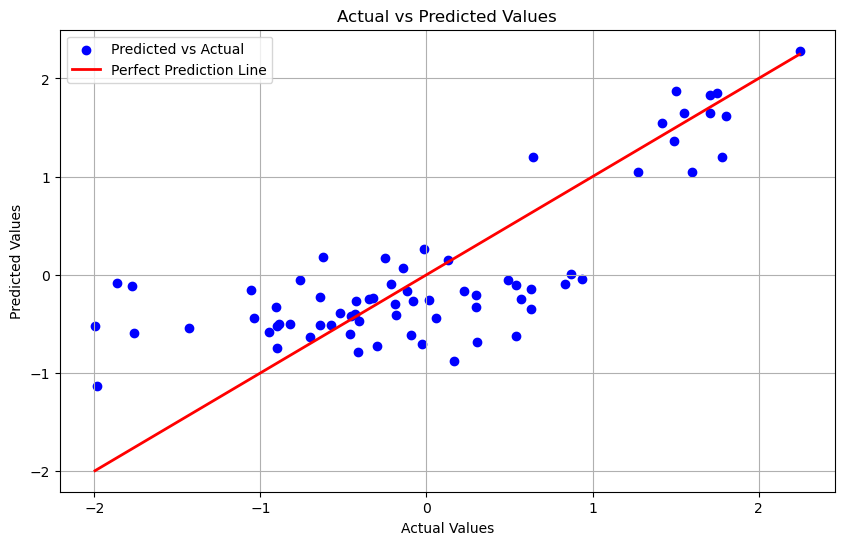

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,color='blue',label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

**3.3 Ridge Regression (Regularized Linear Regression)**

In [57]:
# Define the Ridge regression model
model2= Ridge()

# Define the hyperparameters and grid search
param_grid_ridge={'alpha': [0.1, 1, 10, 100, 1000]}
grid_search_ridge= GridSearchCV(model2,param_grid_ridge,cv=5,scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train,y_train)

print("Best value for alpha : ",grid_search_ridge.best_params_)
print("Best score for cost function: ", grid_search_ridge.best_score_)

# Best model
best_ridge = grid_search_ridge.best_estimator_

# Predictions
y_pred_ridge = best_ridge.predict(X_test)

# Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = best_ridge.score(X_test, y_test)

print(f"Ridge Regression: MSE={mse_ridge}, R2={r2_ridge}")

Best value for alpha :  {'alpha': 0.1}
Best score for cost function:  -0.46736827513521984
Ridge Regression: MSE=0.38924426427498576, R2=0.6092846421236162


The results from second model exactly the same as first model.

**3.4.Making Random Forest Model: second model**

In [50]:
# Define the parameter grid for hyperparameter tuning
param_grid={'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_features': ['sqrt', 'log2'],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
           }

# Define the RandomizedSearchCV for hyperparameter tuning
model3 = RandomForestRegressor(random_state=42)
random_search=RandomizedSearchCV(model3, param_grid, n_iter=100, cv=5, scoring='neg_mean_squared_error',
                                 n_jobs=-1, random_state=42)
random_search.fit(X_train,y_train)

# Best model from random search
best_rf= random_search.best_estimator_

# Predictions
y_pred_rf= best_rf.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = best_rf.score(X_test, y_test)
mae_rf=mean_absolute_error(y_test,y_pred_rf)
rmse_rf=np.sqrt(mse_rf)

print(f"Random Forest Regression(model3): MSE={mse_rf}, R2={r2_rf},MAE={mae_rf}")



Random Forest Regression(model3): MSE=0.3391974697974042, R2=0.6595205813770715,MAE=0.4767762109379094


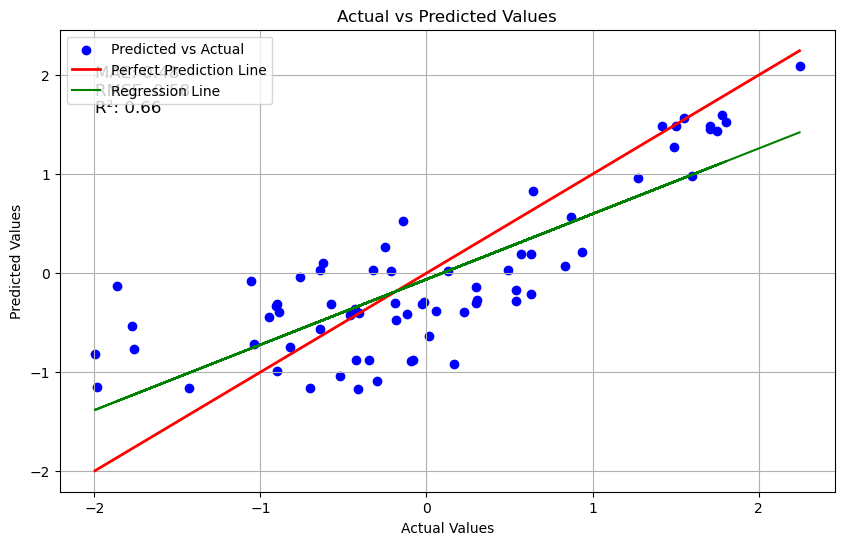

In [51]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')

# Add regression line
m, b = np.polyfit(y_test, y_pred_rf, 1)
plt.plot(y_test, m * y_test + b, color='green', label='Regression Line')
# Add metrics to plot
plt.text(min(y_test), max(y_pred_rf), f'MAE: {mae_rf:.2f}\nRMSE: {rmse_rf:.2f}\nR²: {r2_rf:.2f}', fontsize=12, verticalalignment='top')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

Based on the above plot, the scatter of the blue dots around the red line gives a visual indication of the prediction errors. The closer the dots are to the red line, the better the model's predictions. The green regression line being close to the red line shows that the model has a low bias.

The R² value of 0.66 indicates that 66% of the variance in the actual values can be explained by the model. This is a moderate fit, suggesting the model captures some but not all of the underlying patterns in the data.So I use cross-validation to ensure that the model generalizes well to unseen data. This helps in verifying that the model's performance is consistent across different subsets of the data.

**3.5.Comparison and Model Selection**

After fitting each model, I compare their performance using evaluation metrics such as Mean Squared Error (MSE) and R-squared (R2).

In [60]:
# Cross-Validation Scores for Ridge Regression
cv_scores_ridge = cross_val_score(best_ridge, X_train, y_train, cv=5, scoring='r2')

# Cross-Validation Scores for Random Forest
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')

# Print Evaluation Metrics
print(f"Multiple Linear Regression: MSE={mse_mlr}, R2={r2_mlr}")

print(f"Ridge Regression: MSE={mse_ridge}, R2={r2_ridge}, CV R2={cv_scores_ridge.mean()}")

print(f"Random Forest: MSE={mse_rf}, R2={r2_rf}, CV R2={cv_scores_rf.mean()}")

Multiple Linear Regression: MSE=0.3887239705747481, R2=0.609806902200249
Ridge Regression: MSE=0.38924426427498576, R2=0.6092846421236162, CV R2=0.5189181178428457
Random Forest: MSE=0.3391974697974042, R2=0.6595205813770715, CV R2=0.5871314282567806


Based on the above results :

* **Mean Squared Error (MSE):** Lower values indicate better performance.

Random Forest has the lowest MSE (0.3392), indicating it has the smallest average squared errors in its predictions compared to the other models.

* **R-squared (R2):** Higher values indicate better performance in explaining the variance in the target variable.

Random Forest has the highest R2 value (0.6593), meaning it explains the highest proportion of variance in the target variable compared to the other models.

* **Cross-Validation R-squared (CV R2):** Higher values indicate better performance and generalization across different subsets of the data.

Random Forest has the highest CV R2 (0.5871), suggesting it performs better on average across different subsets of the data.

Based on the evaluation metrics provided (MSE, R2, and CV R2), the Random Forest model performs the best among the three models. It has the lowest Mean Squared Error and the highest R-squared and Cross-Validation R-squared values, indicating better overall performance and generalization capability.

Therefore, the Random Forest model is the better choice based on the given metrics.